In [62]:
import pandas as pd
import numpy as np

In [63]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('fivethirtyeight')
import seaborn as sns

In [64]:
from fractions import Fraction

In [65]:
import re

In [66]:
%ls

NLP_modeling.ipynb              data/
NLP_preprocessing.ipynb         img/
ProjectPlan.md                  scraper_cigar_aficionado.ipynb
README.md                       scraper_cigar_aficionado.py
archive/                        success_metrics.txt
biz_quesetions.md.txt           venv/
cigar_eda.ipynb


In [70]:
data_location = '/Users/djbetts/Documents/data_science/projects/top-25-cigars/data/cigar_aficionado.csv'
df = pd.read_csv(data_location, index_col='Unnamed: 0')
df = df.drop(columns=['image', 'strenth_string', 'href', 'issue'])
df = df.rename(columns={'size': 'shape',  'og_issue':'issue', 'og_issue_date':'issue_date'})
df = df.reset_index().rename(columns={'index': 'cigar_id'})

In [71]:
df.shape

(20769, 16)

In [72]:
df.head()

,cigar_id,name,score,length,gauge,tasting_notes,shape,filler,binder,wrapper,country,price,more_reviews,strength,issue,issue_date
0,0,BOLIVAR ROYAL CORONA,93,"4 7/8""",50.0,"This is an earthy, rich cigar with a lovely br...",Robusto,Cuba,Cuba,Cuba,Cuba,£10.00,"[['89', ['Cigar Aficionado: ', ' ...",NaN,Cigar Aficionado,"– Sep 01, 1992"
1,2,DAVIDOFF GRAN CRU NO. 2,89,"5 5/8""",43.0,An enticing cigar that keeps you coming back f...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,NaN,"[['86', ['Cigar Aficionado: ', ' ...",NaN,Cigar Aficionado,"– Mar 01, 1993"
2,3,ASHTON CORONA,86,"5 1/2""",44.0,This cigar is well-made and gives plenty of fl...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.25,"[['90', ['Cigar Aficionado: ', ' ...",NaN,Cigar Aficionado,"– Mar 01, 1993"
3,4,ASHTON MAGNUM,82,"5""",50.0,"This is a clean, very mild well-made cigar, wi...",Robusto,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.75,"[['87', ['Cigar Aficionado: ', ' ...",NaN,Cigar Aficionado,"– Sep 01, 1992"
4,5,ARTURO FUENTE CHATEAU FUENTE SUN GROWN,86,"4 1/2""",50.0,"Finely constructed, A. Fuente's robusto has a ...",Robusto,Dom. Rep.,Dom. Rep.,Ecuador,Dominican Republic,NaN,"[['89', ['Cigar Aficionado: ', ' ...",NaN,Cigar Aficionado,"– Sep 01, 1992"


# standardize fab country

In [73]:
df['country'].nunique()

16

In [74]:
def standardize_country_broad(country):
    if pd.isna(country):
        return None
    country = country.strip().title()
    
    # Mapping known variations to a standardized country name
    country_mapping = {
        "Dom. Rep.": "Dominican Republic",
        "Dominican": "Dominican Republic",
        "U.S.A": "USA",
        "Usa": "USA",
        "United States": "USA",
        "Phillippines": "Philippines",
        "Canary Is.": "Canary Islands",
    }
    
    # Return the mapped country name if found, else use title case version
    return country_mapping.get(country, country)

# Usage
df['country'] = df['country'].apply(standardize_country_broad)

In [75]:
df['country'].nunique()

16

# standardize filler

In [76]:
print(df['filler'].nunique())
df['filler'].unique()

386


array(['Cuba', 'Dom. Rep.', 'Nicaragua', 'Honduras, Nicaragua, Dom. Rep.',
       'Dom. Rep., Mexico', 'Dom. Rep., Brazil', 'Mexico, Dom. Rep.',
       'Dom. Rep., Nicaragua', 'Mexico', 'Dom.Rep.', 'Honduras',
       'Dom. Rep., Jamaica', 'Dom. Rep., Honduras, Nicaragua',
       'Honduras, Dom. Rep., Nicaragua', 'Honduras, Mexico, Dom. Rep.',
       'Nicaragua, Hon., Dom. Rep.', 'Brazil, Nicaragua, Ecuador',
       'Nicaragua, Mexico', 'Dom. Rep., Mexico, Jamaica', 'Phillippines',
       'Canary Island, Brazil, Dom. Rep.', 'Jamaica, Dom. Rep.',
       'Dom. Rep., Mexico, Brazil', 'Dom. Rep., Nicaragua, Honduras',
       'Nicaragua, Dom. Rep., Brazil', 'Dom. Rep., Honduras',
       'Dom. Rep., Jamaica,  Indonesia', 'Brazil',
       'Dom. Rep., Mexico, Nicaragua', 'Nicaragua, Honduras',
       'Dom. Rep., Nicaragua, Honduras, Brazil', 'Honduras, Nicaragua',
       'Honduras, Dom. Rep., Costa Rica', 'Dom. Rep, Honduras',
       'Dom. Rep., Brazil, Nicaragua', 'Nicaragua, Dom. Rep.',
     

In [77]:
def standardize_filler_column(filler):
    if pd.isna(filler):
        return None
    
   # Define mappings for common variations, typos, and encoding issues
    filler_mapping = {
        "Dom. Rep.": "Dominican Republic",
        "Dominican Republic": "Dominican Republic",
        "Dom.Rep.": "Dominican Republic",
        "Dom. Rep": "Dominican Republic",
        "Dom. Republic": "Dominican Republic",
        "Dom. Rep/": "Dominican Republic",
        "Domi, Ic, Republic": "Dominican Republic",
        "Nic.": "Nicaragua",
        "Nica.": "Nicaragua",
        "Nic, R, Gu": "Nicaragua",
        "Nicr, Gu": "Nicaragua",
        "Ho.": "Honduras",
        "Ho, Ur, S": "Honduras",
        "Hond.": "Honduras",
        "Hon.": "Honduras",
        "Phillippi, Es": "Philippines",
        "Philipines": "Philippines",
        "Phillippines": "Philippines",
        "Columbia": "Colombia",
        "Colombi": "Colombia",
        "Columbi": "Colombia",
        "Nicaraguan": "Nicaragua",
        "Cube": "Cuba",
        "Sumatra": "Indonesia",  # Assuming Sumatra refers to Indonesian tobacco
        "Ind.": "Indonesia",
        "U.S.A.": "USA",
        "Conn. Broadleaf": "Connecticut Broadleaf",
        "Penn. Broadleaf": "Pennsylvania Broadleaf",
        "Can. Isl.": "Canary Islands",
        "Canary Isl.": "Canary Islands",
        "C, Ry, Isl, S": "Canary Islands",
        "Mex.": "Mexico",
        "Br.": "Brazil",
        "Br, Zil": "Brazil",
        "Ecu.": "Ecuador",
        "J, M, Ic": "Jamaica",
        "Ho, Ur, S, Nic": "Honduras, Nicaragua",
        "Ho, Ur, S, Cost, Ric": "Honduras, Costa Rica",
        "Cost, Ric": "Costa Rica",
        "Speci, L Ble": "Special Blend",
        "Nicragua": "Nicaragua",
        "Nic.": "Nicaragua",
        "Nicragua": "Nicaragua",
        "Nicaraga": "Nicaragua",
        "Hondura": "Honduras",
        "Dom .Rep.": "Dominican Republic",
        "Dom. Rep.": "Dominican Republic",
        "Dom. Republic": "Dominican Republic",
        "Dom. Rep. Nicaragua": "Dominican Republic, Nicaragua",
        "Dom. Rep/ Nicaragua": "Dominican Republic, Nicaragua",
        "Dom. Rep/ Ncaragua": "Dominican Republic, Nicaragua",
        "Dominican": "Dominican Republic",
        "Mexico. Dom. Rep.": "Mexico, Dominican Republic",
        "U.S.A.": "USA",
        "Usa": "USA",
        "USA/Connecticut Broadleaf": "USA/Connecticut Broadleaf",
        "U.S.A./Conn. Broadleaf": "USA/Connecticut Broadleaf",
        "U.S.A./Conn. Shade": "USA/Connecticut Shade",
        "U.S.A./Kentucky": "USA/Kentucky",
        "U.S.A./Penn. Broadleaf": "USA/Pennsylvania Broadleaf",
        "U.S.A./Conn. Habano": "USA/Connecticut Habano",
        "U.S.A./Conn.": "USA/Connecticut",
        "U.S.A./Pennsylvania": "USA/Pennsylvania",
        "Phillipines": "Philippines",
        "Philippi, Es": "Philippines",
        "Columbia": "Colombia",
        "Colombi": "Colombia",
        "Columbi": "Colombia",
        "Jam.": "Jamaica",
        "Jamaica, Dom. Rep.": "Jamaica, Dominican Republic",
        "Can. Islands": "Canary Islands",
        "Canary Island": "Canary Islands",
        "Dom. Rep. Brazil": "Dominican Republic, Brazil",
    
        # Other Tobacco and Regional Variants
        "Conn. Broadleaf": "Connecticut Broadleaf",
        "Penn. Broadleaf": "Pennsylvania Broadleaf",
        "Cameroon": "Cameroon",
        "Indonesia": "Indonesia",  # Assuming Indonesian tobacco
    
        # Garbled and Special Cases
        "Various Blends Of Cuban Seed": "Cuban Seed Blend",
        "Pananma": "Panama",
        # "N/A": None,
        # "Tk": None  # Assuming Tk represents missing or null data
    }
    
    # Split the filler on common delimiters and standardize each part
    countries = re.split(r',', filler)
    standardized_countries = [filler_mapping.get(filler.strip().title(), filler.strip().title()) for filler in countries]
    
    # Join back the standardized names
    return ", ".join(standardized_countries)

# Apply the function to the 'filler' column
df['filler'] = df['filler'].apply(standardize_filler_column)


In [78]:
print(df.filler.nunique())

293


# standardize binder

In [79]:
print(df.binder.nunique())

85


In [80]:
df.binder.unique()

array(['Cuba', 'Dom. Rep.', 'Nicaragua', 'U.S.A./Conn. Broadleaf',
       'Mexico', 'Dom.Rep.', 'Ecuador', 'Honduras',
       'U.S.A./Connecticut Broadleaf', 'Indonesia', 'Phillippines',
       'Canary Island', 'Dom. Rep', 'Cameroon', 'Brazil', 'Colombia',
       'Costa Rica', 'NIcaragua', 'U.S.A.', 'U.S.A./Pennsylvania',
       'Canary Islands', 'U.S.A./Conn.Broadleaf', 'Philippines',
       'U.S.A./Connecticut Shade', 'Nicarauga', 'U.S.A./Connecticut',
       'U.S.A./Conn. Shade', 'Sumatra', 'Phillipines, Brazil',
       'Central America', nan, 'honduras', 'Dom Rep.',
       'U.S.A./Conn Broadleaf', 'Dom. Rep., Brazil', 'Java', 'Philipines',
       'Indonesia/Ecuador', 'U.S.A./Conn. Braodleaf',
       'U.S.A/ Conn. Broadleaf', 'Nicaragua, Dom. Rep.', 'U.S.A./Conn.',
       'Nicatagua', 'Hoduras', 'Dom. Rep., Nicaragua',
       'U.S.A/Conn. Shade', 'U.S.A./Kentucky', "(Habano '92)",
       'U.S.A./Conn.  Shade', 'Nicaragua, Honduras', 'Nicaragua,', 'TK',
       'Cubaœœ', 'tk', 'Nicara

In [81]:
def standardize_binder_column(binder):
    if pd.isna(binder):
        return None

    # Define mappings for common variations, typos, and encoding issues
    binder_abbreviation_mapping = {
        # Country Abbreviations and Typos
        "Dom. Rep.": "Dominican Republic",
        "Dom.Rep.": "Dominican Republic",
        "Dom. Rep": "Dominican Republic",
        "Dom Rep.": "Dominican Republic",
        "NIcaragua": "Nicaragua",
        "Nicarauga": "Nicaragua",
        "Nicatagua": "Nicaragua",
        "Nicaraua": "Nicaragua",
        "Nicaragua,": "Nicaragua",
        "Nicaragua, ": "Nicaragua",
        "Hoduras": "Honduras",
        "honduras": "Honduras",
        "Coast Rica": "Costa Rica",
        "Columbia": "Colombia",
        "Canary Island": "Canary Islands",

        # USA Related Variations
        "USA": "USA",
        "Usa": "USA",
        "U.S.A.": "USA",
        "Usa/Connecticut Broadleaf": "USA/Connecticut Broadleaf",
        "U.S.A./Conn. Broadleaf": "USA/Connecticut Broadleaf",
        "U.S.A./Connecticut Broadleaf": "USA/Connecticut Broadleaf",
        "U.S.A./Conn.Broadleaf": "USA/Connecticut Broadleaf",
        "U.S.A./Conn Broadleaf": "USA/Connecticut Broadleaf",
        "U.S.A./ Conn Broadleaf": "USA/Connecticut Broadleaf",
        "U.S.A./ Conn. Broadleaf": "USA/Connecticut Broadleaf",
        "U.S.A./Conn. Braodleaf": "USA/Connecticut Broadleaf",
        "USA/Connecticut": "USA/Connecticut Broadleaf",
        "U.S.A./Connecticut": "USA/Connecticut Broadleaf",
        "U.S.A/ Conn. Broadleaf": "USA/Connecticut Broadleaf",
        "U.S.A./ Conn.": "USA/Connecticut Broadleaf",
        "U.S.A./Conn.": "USA/Connecticut Broadleaf",
        "U.S.A./Connecticut Shade": "USA/Connecticut Shade",
        "U.S.A./Conn. Shade": "USA/Connecticut Shade",
        "U.S.A/Conn. Shade": "USA/Connecticut Shade",
        "USA/Connecticut Shade": "USA/Connecticut Shade",
        "Usa/Connecticut Shade": "USA/Connecticut Shade",
        "U.S.A./Conn.  Shade": "USA/Connecticut Shade",
        "USA/Connecticut Habano": "USA/Connecticut Habano",
        "U.S.A./Conn. Habano": "USA/Connecticut Habano",
        "U.S.A. / Conn. Habano": "USA/Connecticut Habano",
        "USA/Pennsylvania Broadleaf": "USA/Pennsylvania Broadleaf",
        "U.S.A./Pennsylvania": "USA/Pennsylvania Broadleaf",
        "Usa/Pennsylvania Broadleaf": "USA/Pennsylvania Broadleaf",
        "U.S.A/Conn. Broadleaf, USA/Connecticut Shade": "USA/Connecticut Broadleaf, USA/Connecticut Shade",
        "Usa/Connecticut Broadleaf, Usa/Connecticut Shade": "USA/Connecticut Broadleaf, USA/Connecticut Shade",
        "Mexico, USA/Connecticut Shade": "Mexico, USA/Connecticut Shade",
        "Usa/Kentucky": "USA/Kentucky",
        "Usa/Conn.": "USA/Connecticut Broadleaf",

        # Other Tobacco and Regional Variants
        "Phillippines": "Philippines",
        "Philipines": "Philippines",
        "Philippines, Brazil": "Philippines, Brazil",
        "Central America": "Central America",
        "Java": "Java",
        "Sumatra": "Indonesia",  # Assuming Sumatra as a region in Indonesia
        "(Habano '92)": "(Habano '92)",
        "Cameroon, Dom. Rep.": "Cameroon, Dominican Republic",
        "Connecticut": "Connecticut Broadleaf",
        "Connecticut Broadleaf": "Connecticut Broadleaf",
        "Indonesia/Ecuador": "Indonesia, Ecuador",  # Consistent delimiter
        "Cubaœœ": "Cuba",  # Encoding issue
        # "Tk": None  # Placeholder for missing data
    }

    # Split the binder on common delimiters and standardize each part
    countries = re.split(r',', binder)
    standardized_countries = [
        binder_abbreviation_mapping.get(country.strip(), country.strip().title())
        for country in countries
    ]

    # Join back the standardized names
    return ", ".join(standardized_countries)

# Apply the function to the 'binder' column
df['binder'] = df['binder'].apply(standardize_binder_column)


In [82]:
df.binder.nunique()

50

# standarize wrapper

In [83]:
df['wrapper'].nunique()

98

In [84]:
def standardize_wrapper_column(wrapper):
    if pd.isna(wrapper):
        return None

    # Define mappings for common variations, typos, and encoding issues
    wrapper_abbreviation_mapping = {
        # Country Abbreviations and Typos
        "dom. rep.": "Dominican Republic",
        "dom.rep.": "Dominican Republic",
        "dom. rep": "Dominican Republic",
        "dom rep.": "Dominican Republic",
        "nicaraga": "Nicaragua",
        "nicarargua": "Nicaragua",
        "nicaragua,": "Nicaragua",
        "honduras": "Honduras",
        "hondras": "Honduras",
        "cameronn": "Cameroon",
        "columbia": "Colombia",
        "coast rica": "Costa Rica",
        
        # USA Related Variations
        "u.s.a.": "USA",
        "usa": "USA",
        "u.s.a./connecticut shade": "USA/Connecticut Shade",
        "u.s.a./conn. shade": "USA/Connecticut Shade",
        "u.s.a./conneticut shade": "USA/Connecticut Shade",  # Misspelled "Conneticut"
        "u.s.a./conn. sun-grown": "USA/Connecticut Sun-Grown",
        "u.s.a./connecticut broadleaf": "USA/Connecticut Broadleaf",
        "u.s.a./conn. broadleaf": "USA/Connecticut Broadleaf",
        "u.s.a./pennsylvania": "USA/Pennsylvania Broadleaf",
        "u.s.a./penn. broadleaf": "USA/Pennsylvania Broadleaf",
        "u.s.a/ conn. broadleaf": "USA/Connecticut Broadleaf",
        "u.s.a. / conn. broadleaf": "USA/Connecticut Broadleaf",
        "u.s.a / connecticut broadleaf": "USA/Connecticut Broadleaf",
        "u.s.a. conn. broadleaf": "USA/Connecticut Broadleaf",
        "u.s.a./conn. habano": "USA/Connecticut Habano",
        "u.s.a. / conn. habano": "USA/Connecticut Habano",
        "u.s.a. connecticut havana": "USA/Connecticut Havana",
        
        # Blended or Multi-Origin Variants
        "connecticut shade.": "Connecticut Shade",
        "ct shade/broadleaf": "Connecticut Shade/Broadleaf",
        "ecuador, conn. broadleaf": "Ecuador, Connecticut Broadleaf",
        "u.s.a./conn. shade/broadleaf": "USA/Connecticut Shade/Broadleaf",
        "u.s.a./conn shade": "USA/Connecticut Shade",
        "ecuador, u.s.a./conn. broadleaf": "Ecuador, USA/Connecticut Broadleaf",
        "mexican": "Mexico",
        
        # General Tobacco Regions and Other Typos
        "sumatra": "Indonesia",
        "habano ecuador": "Ecuador Habano",
        "ecuadorian connecticut shade": "Ecuador Connecticut Shade",
        "ecuador/ connecticut": "Ecuador, Connecticut",
        "ecuador, conn. broadleaf": "Ecuador, Connecticut Broadleaf",
        "tktk": None,  # Placeholder for missing data
        "tk": None,
        "(": None
    }

    # Split the wrapper on commas and standardize each part, converting to lowercase for lookup
    components = re.split(r',', wrapper.lower())
    standardized_components = [
        wrapper_abbreviation_mapping.get(component.strip(), component.strip().title())
        for component in components
    ]

    # Join back the standardized names
    return ", ".join(filter(None, standardized_components))

# Apply the function to the 'wrapper' column
df['wrapper'] = df['wrapper'].apply(standardize_wrapper_column)


In [85]:
df['wrapper'].nunique()

74

In [86]:
# Replace 'your_column' with the actual column name
value_counts = df['wrapper'].value_counts()

# Filter to show only values with a count of 1
print(value_counts[value_counts == 1])

wrapper
Connecticut Shade                                   1
Nicaragua, Honduras                                 1
Ecuador, USA/Connecticut Broadleaf                  1
Nicaragua, Ecuador                                  1
Honduras, Nicaragua                                 1
USA/Connecticut Shade, USA/Connecticut Broadleaf    1
USA/Connecticut Broadleaf, Conn. Shade              1
Honduras, Costa Rica                                1
Ecuador     Mediano                                 1
Indonesia, Philippines                              1
Connecticut Shade/Broadleaf                         1
U.S.A. /Conn. Broadleaf                             1
U.S.A/Conn                                          1
U.S.A./Conn., Ecuador                               1
USA/Connecticut Shade/Broadleaf                     1
Colombia                                            1
San Andres Corojo                                   1
Connecticut                                         1
U.S.A./ Conn., Ecuad

# shape

In [87]:
df['shape'].nunique()

25

In [88]:
def standardize_shape(shape):
    # Define mappings for standardizing cigar shapes
    shape_mapping = {
        'Robusto': 'Robusto',
        'robusto': 'Robusto',
        'Corona': 'Corona',
        'Petit Corona': 'Petite Corona',
        'Patit Corona': 'Petite Corona',
        'Petite Corona': 'Petite Corona',
        'Double Corona': 'Double Corona',
        'Lonsdale': 'Lonsdale',
        '"A"': 'A',
        'Churchill': 'Churchill',
        'Churcill': 'Churchill',
        'Toro': 'Toro',
        'Figurado': 'Figurado',
        'FIgurado': 'Figurado',
        'Figruado': 'Figurado',
        'Panetela': 'Panetela',
        'Panetlea': 'Panetela',
        'Maduro': 'Maduro',
        'Corona Gorda': 'Corona Gorda',
        'Grande': 'Grande',
        'Torpedo': 'Torpedo',
        'Miscellaneous': 'Miscellaneous',
        'Misc.': 'Miscellaneous',
        'Odd': 'Odd',
        'Vintage': 'Vintage'
    }

    # Standardize the shape if it exists in the mapping, otherwise return the original or NaN if not present
    return shape_mapping.get(shape, shape)

# Apply the function to the 'shape' column
df['shape'] = df['shape'].apply(standardize_shape)


In [89]:
df['shape'].nunique()

17

In [90]:
df['shape'].value_counts()

shape
Toro             3848
Figurado         3659
Robusto          3477
Churchill        2791
Corona           1701
Lonsdale         1348
Double Corona     949
Petite Corona     938
Panetela          685
Odd               575
Grande            375
Maduro            196
A                 189
Vintage            14
Corona Gorda        4
Miscellaneous       3
Torpedo             1
Name: count, dtype: int64

In [91]:
# why is there only 1 torpedo?
# look at A, Odd, Vintage columns for future cleaning

# length

In [92]:
df.length.unique()

array(['4 7/8"', '5 5/8"', '5 1/2"', '5"', '4 1/2"', '7 5/8"', '7 1/2"',
       '6"', '5 9/16"', '5 1/4"', '5 7/8"', '5 3/4"', '6 1/2"', '6 5/8"',
       '6 3/4"', '7"', '6 1/4"', '6 7/8"', '6 9/16"', '4 3/4"', '5 1/8"',
       '8 1/2"', '8"', '7 1/4"', '6 3/8"', '6 1/8"', '6 5/16"', '4 5/8"',
       '7 3/4"', '6 1/2', '4 1/4"', '9"', '6 15/16', '8 1/4"', '8 2/3"',
       '5 1/16"', '6 7/4"', '4"', '5 3/5"', '8 1/2', '7 1/2', '7 5/8',
       '7 3/4', '9 1/4"', '5 3/8"', '8 7/8"', '7 1/8"', '5 1/5"',
       '5 3/16"', '8 1/4', '10"', '4 1/5"', '4 1/4 "', '5 1/3"',
       '4 1/2 "', '6 1/3"', '6 1/5"', '8', nan, '9 1/2"', '3 1/2"',
       '4 3/8"', '7 7/8"', '7 3/8"', '4', '6 1/2 "', "7 1/4'", '7 2/4"',
       '6 3/32"', '8 5/8"', '3 5/8"', '8 3/4"', '4 1/3"', '5 5/8""',
       '5"\x0b', '3 15/16"', '6 11/16"', '5 11/16"', '4 5/16"', '4 1/8"',
       '4 15/16"', '4 3/16"', '"', '6 1/8', '9 1/8', '7 1/4', '4 4/5"',
       '6 9/6"', 'tk"', '12"', '50', '52', 'TK', '6 1/4', '3 3/4"',
      

In [93]:
def parse_length(length):
    if pd.isna(length) or length in ["tk", "TK", "", '"']:
        return None  # Handle NaNs and placeholders
    
    # Remove any extraneous characters like quotes, extra spaces, and "inch"
    cleaned_length = re.sub(r'[\'"”]', '', str(length)).strip().lower()
    cleaned_length = re.sub(r' inch', '', cleaned_length)

    # Split the length on spaces
    parts = cleaned_length.split()
    
    try:
        if len(parts) == 2:  # If we have both whole and fraction parts
            whole_part, fraction_part = parts
            return float(whole_part) + float(Fraction(fraction_part))
        elif len(parts) == 1:  # If it's just a single whole number or fraction
            return float(Fraction(parts[0]))
        else:
            return None  # If we have more parts than expected, treat as invalid
    except ValueError:
        return None

# Apply the function to the 'length' column
df['length'] = df['length'].apply(parse_length)

In [94]:
df.length.unique()

array([ 4.875     ,  5.625     ,  5.5       ,  5.        ,  4.5       ,
        7.625     ,  7.5       ,  6.        ,  5.5625    ,  5.25      ,
        5.875     ,  5.75      ,  6.5       ,  6.625     ,  6.75      ,
        7.        ,  6.25      ,  6.875     ,  6.5625    ,  4.75      ,
        5.125     ,  8.5       ,  8.        ,  7.25      ,  6.375     ,
        6.125     ,  6.3125    ,  4.625     ,  7.75      ,  4.25      ,
        9.        ,  6.9375    ,  8.25      ,  8.66666667,  5.0625    ,
        4.        ,  5.6       ,  9.25      ,  5.375     ,  8.875     ,
        7.125     ,  5.2       ,  5.1875    , 10.        ,  4.2       ,
        5.33333333,  6.33333333,  6.2       ,         nan,  9.5       ,
        3.5       ,  4.375     ,  7.875     ,  7.375     ,  6.09375   ,
        8.625     ,  3.625     ,  8.75      ,  4.33333333,  3.9375    ,
        6.6875    ,  5.6875    ,  4.3125    ,  4.125     ,  4.9375    ,
        4.1875    ,  9.125     ,  4.8       , 12.        , 50.  

In [95]:
invalid_count = df['length'].isna().sum()
print(f"Number of invalid cases: {invalid_count}")

Number of invalid cases: 22


# gauge

In [96]:
# Convert the 'gauge' column to float
df['gauge'] = pd.to_numeric(df['gauge'], errors='coerce')

# strength

In [97]:
df.columns

Index(['cigar_id', 'name', 'score', 'length', 'gauge', 'tasting_notes',
       'shape', 'filler', 'binder', 'wrapper', 'country', 'price',
       'more_reviews', 'strength', 'issue', 'issue_date'],
      dtype='object')

In [98]:
df.strength.value_counts()

strength
4.0    5511
5.0    4788
3.0    1061
6.0     961
2.0     555
1.0       3
Name: count, dtype: int64

# price

In [99]:
df.price.unique()

array(['£10.00', nan, '$6.25', ..., '£17.4', '$25.99', '£31.70'],
      dtype=object)

In [100]:
df.price.nunique()

1757

In [101]:
df.price.value_counts()

price
$8.00     420
$6.00     405
$9.00     367
$10.00    362
$7.50     360
         ... 
$13.76      1
$29.60      1
£24.94      1
£20.67      1
£31.70      1
Name: count, Length: 1757, dtype: int64

In [102]:
# Define conversion rate
conversion_rate = 1.3  # ~GBP to USD conversion rate

# Function to clean, label, and convert price values
def standardize_price(price):
    if pd.isna(price):
        return None, None  # Return None if value is missing
    
    price = price.strip()  # Remove any extra spaces
    if price.startswith('£'):
        try:
            # Convert GBP to USD
            gbp_value = float(price.replace('£', '').replace(',', ''))
            usd_value = gbp_value * conversion_rate
            return usd_value, 'GBP'
        except ValueError:
            return None, None
    elif price.startswith('$'):
        try:
            # If in USD, remove symbol and convert directly
            usd_value = float(price.replace('$', '').replace(',', ''))
            return usd_value, 'USD'
        except ValueError:
            return None, None
    else:
        return None, None  # If currency symbol not recognized

# Apply function and create new columns
df[['usd_value', 'currency']] = df['price'].apply(lambda x: pd.Series(standardize_price(x)))

# Show the new columns for validation
df[['price', 'usd_value', 'currency']]


,price,usd_value,currency
0,£10.00,13.000,GBP
1,NaN,NaN,None
2,$6.25,6.250,USD
3,$6.75,6.750,USD
4,NaN,NaN,None
...,...,...,...
20764,$13.25,13.250,USD
20765,£24.50,31.850,GBP
20766,£31.70,41.210,GBP
20767,£22.10,28.730,GBP


In [103]:
df.shape

(20769, 18)

# og_issue

In [104]:
df.issue.value_counts()

issue
Cigar Aficionado    13108
Cigar Insider        7661
Name: count, dtype: int64

# og_issue_date

In [105]:
df.issue_date

0        – Sep 01, 1992
1        – Mar 01, 1993
2        – Mar 01, 1993
3        – Sep 01, 1992
4        – Sep 01, 1992
              ...      
20764    – Dec 08, 2020
20765    – Dec 08, 2020
20766    – Dec 08, 2020
20767    – Dec 08, 2020
20768    – Dec 08, 2020
Name: issue_date, Length: 20769, dtype: object

In [106]:
# Function to clean and convert date column
def convert_to_datetime(date_str):
    if pd.isna(date_str):
        return None  # Handle missing values
    
    # Remove the leading dash and whitespace
    cleaned_date = date_str.strip("– ")
    
    # Convert to datetime
    try:
        return pd.to_datetime(cleaned_date, format='%b %d, %Y')
    except ValueError:
        return None  # Return None if there's a format issue

# Apply the function to the 'date' column
df['issue_date'] = df['issue_date'].apply(convert_to_datetime)

# Show the converted dates for validation
df['issue_date']


0       1992-09-01
1       1993-03-01
2       1993-03-01
3       1992-09-01
4       1992-09-01
           ...    
20764   2020-12-08
20765   2020-12-08
20766   2020-12-08
20767   2020-12-08
20768   2020-12-08
Name: issue_date, Length: 20769, dtype: datetime64[ns]

In [107]:
df.issue.iloc[0]

'Cigar Aficionado'

In [108]:
df.columns

Index(['cigar_id', 'name', 'score', 'length', 'gauge', 'tasting_notes',
       'shape', 'filler', 'binder', 'wrapper', 'country', 'price',
       'more_reviews', 'strength', 'issue', 'issue_date', 'usd_value',
       'currency'],
      dtype='object')

# output clean data

In [109]:
df.to_csv('data/clean_cigar_eda.csv', index=False)

# EDA

In [110]:
df.dtypes

cigar_id                  int64
name                     object
score                     int64
length                  float64
gauge                   float64
tasting_notes            object
shape                    object
filler                   object
binder                   object
wrapper                  object
country                  object
price                    object
more_reviews             object
strength                float64
issue                    object
issue_date       datetime64[ns]
usd_value               float64
currency                 object
dtype: object

# histogram

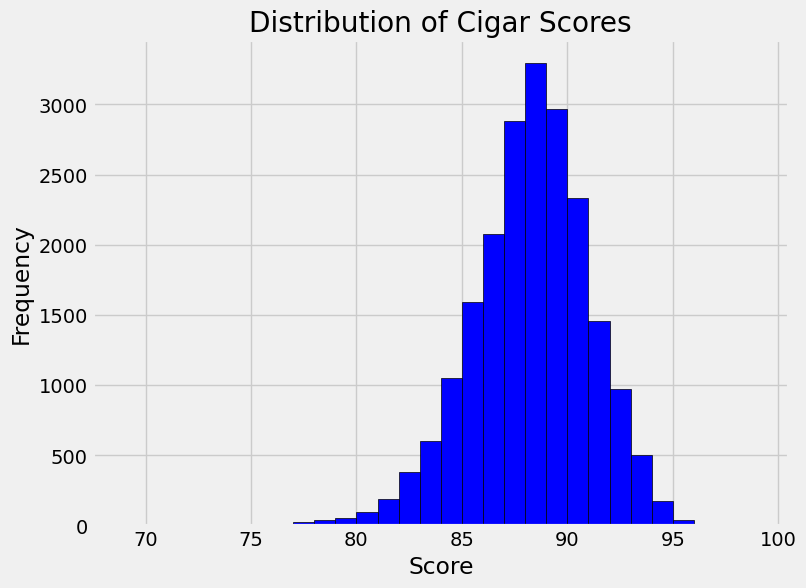

In [111]:
# Plotting the distribution of scores as a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['score'], bins=30, color='blue', edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Cigar Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

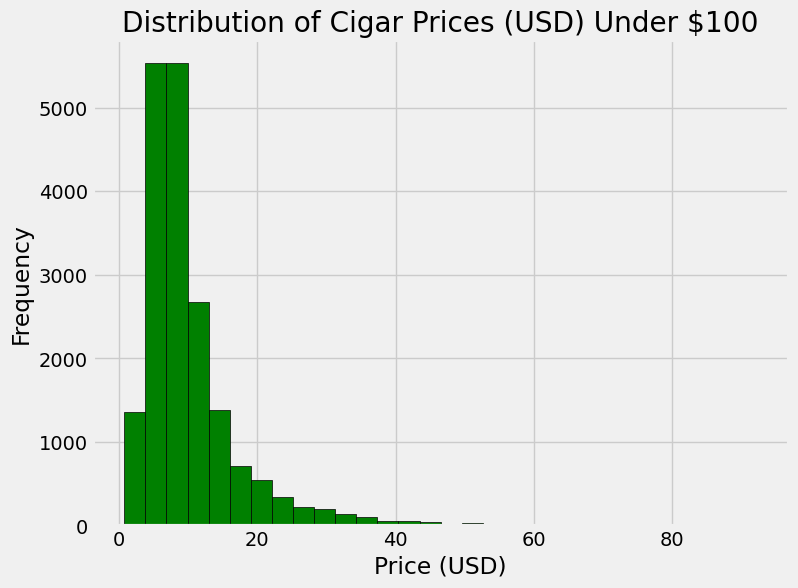

In [112]:
# Plotting the distribution of usd_value under $100 as a histogram
plt.figure(figsize=(8, 6))
plt.hist(df[df['usd_value'] < 100]['usd_value'].dropna(), bins=30, color='green', edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Cigar Prices (USD) Under $100')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


# average score and review count over time

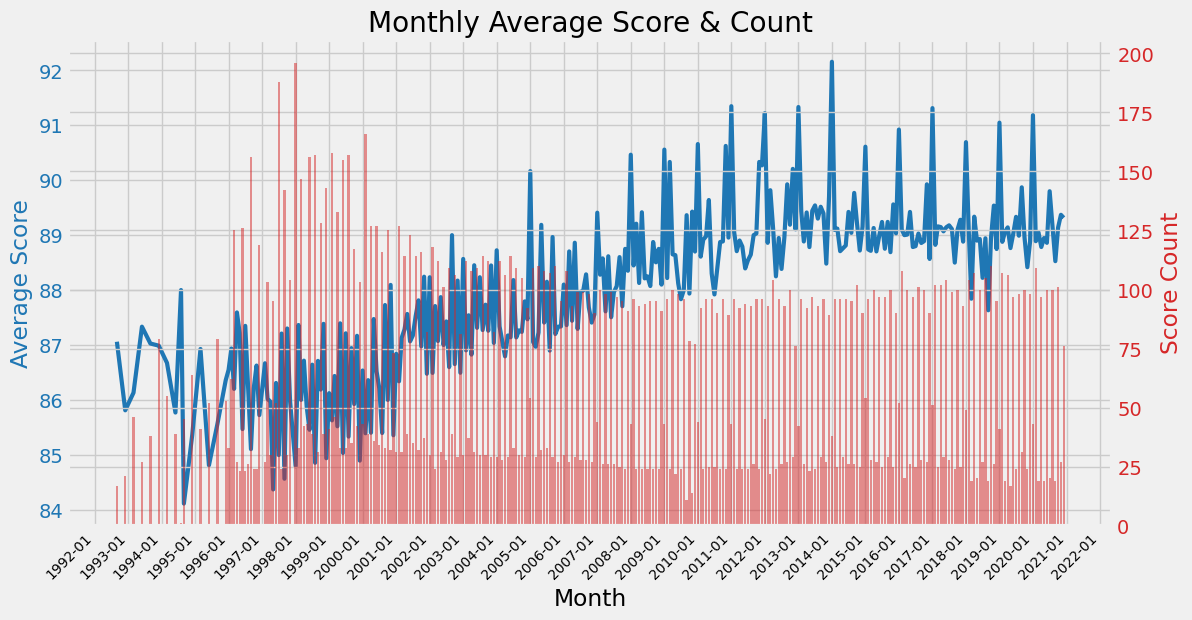

In [113]:
# Group by issue date for monthly, quarterly, and annual average score
# Monthly average score
monthly_avg_score = df.groupby(df['issue_date'].dt.to_period('M'))['score'].mean()

# Monthly Average Score with Count Overlay
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_title('Monthly Average Score & Count')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Score', color='tab:blue')
ax1.plot(monthly_avg_score.index.to_timestamp(), monthly_avg_score, color='tab:blue', label='Average Score', linewidth=3)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary y-axis for monthly count of scores
monthly_score_count = df.groupby(df['issue_date'].dt.to_period('M'))['score'].count()
ax2 = ax1.twinx()
ax2.set_ylabel('Score Count', color='tab:red')
ax2.bar(monthly_score_count.index.to_timestamp(), monthly_score_count, color='tab:red', alpha=0.5, width=25, label='Score Count')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set x-axis locator and formatter for better month display
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Adjust x-axis font size and rotation for date labels
ax1.tick_params(axis='x', labelsize=10)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

plt.show()

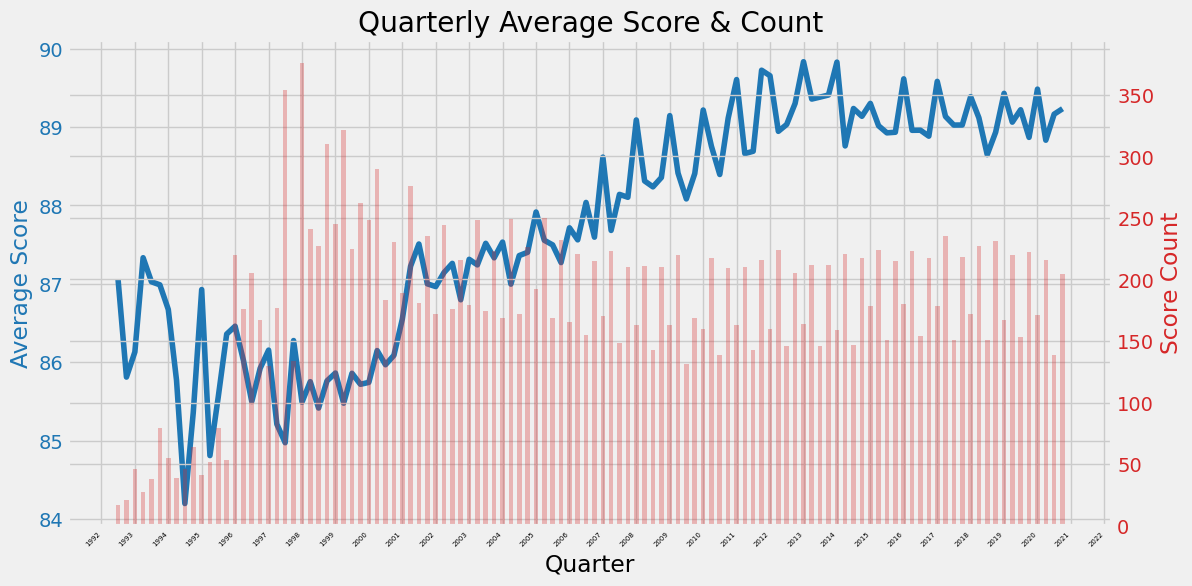

In [114]:
# Quarterly average score
quarterly_avg_score = df.groupby(df['issue_date'].dt.to_period('Q'))['score'].mean()

# Quarterly Average Score with Count Overlay
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_title('Quarterly Average Score & Count')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Average Score', color='tab:blue')

# Plotting quarterly average score
ax1.plot(quarterly_avg_score.index.to_timestamp(), quarterly_avg_score, color='tab:blue', label='Average Score', linewidth=4)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary y-axis for quarterly count of scores
quarterly_score_count = df.groupby(df['issue_date'].dt.to_period('Q'))['score'].count()
ax2 = ax1.twinx()
ax2.set_ylabel('Score Count', color='tab:red')
ax2.bar(quarterly_score_count.index.to_timestamp(), quarterly_score_count, color='tab:red', alpha=0.3, width=50, label='Score Count')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set x-axis locator for better quarter display
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Adjust x-axis font size and rotation for quarter labels
ax1.tick_params(axis='x', labelsize=5)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

plt.show()

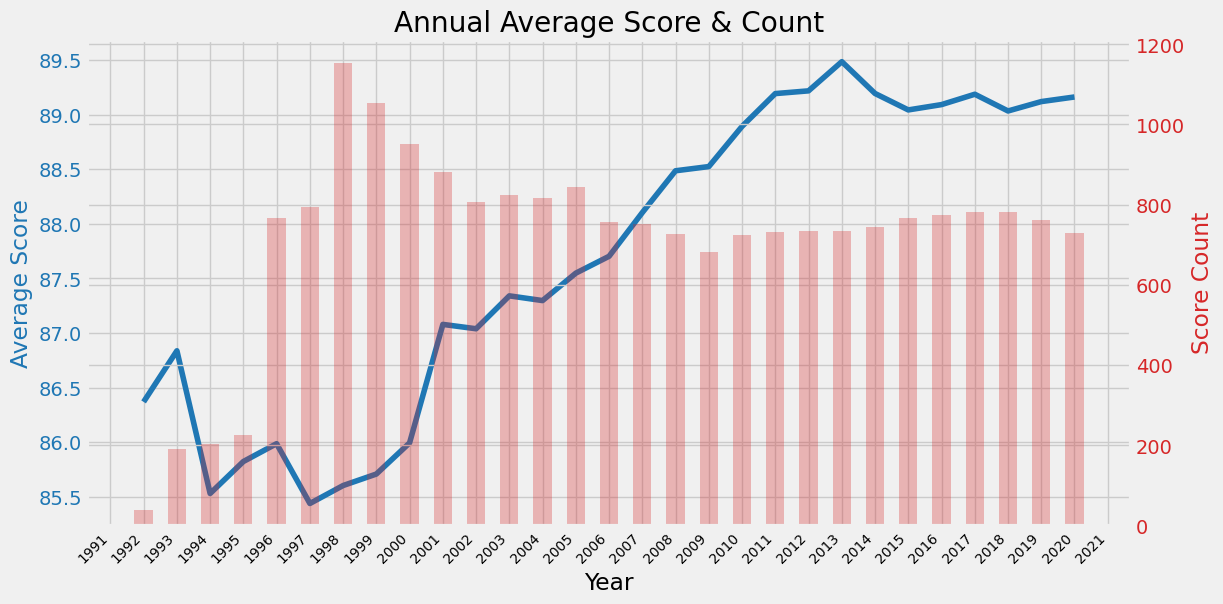

In [115]:
# Annual average score
annual_avg_score = df.groupby(df['issue_date'].dt.to_period('Y'))['score'].mean()


# Annual Average Score with Count Overlay
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_title('Annual Average Score & Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Score', color='tab:blue')
ax1.plot(annual_avg_score.index.to_timestamp(), annual_avg_score, color='tab:blue', label='Average Score')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary y-axis for annual count of scores
annual_score_count = df.groupby(df['issue_date'].dt.to_period('Y'))['score'].count()
ax2 = ax1.twinx()
ax2.set_ylabel('Score Count', color='tab:red')
ax2.bar(annual_score_count.index.to_timestamp(), annual_score_count, color='tab:red', alpha=0.3, width=200, label='Score Count')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set x-axis locator for better year display
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set x-axis font size and rotation for date labels
ax1.tick_params(axis='x', labelsize=10)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

plt.show()

# price and score over time

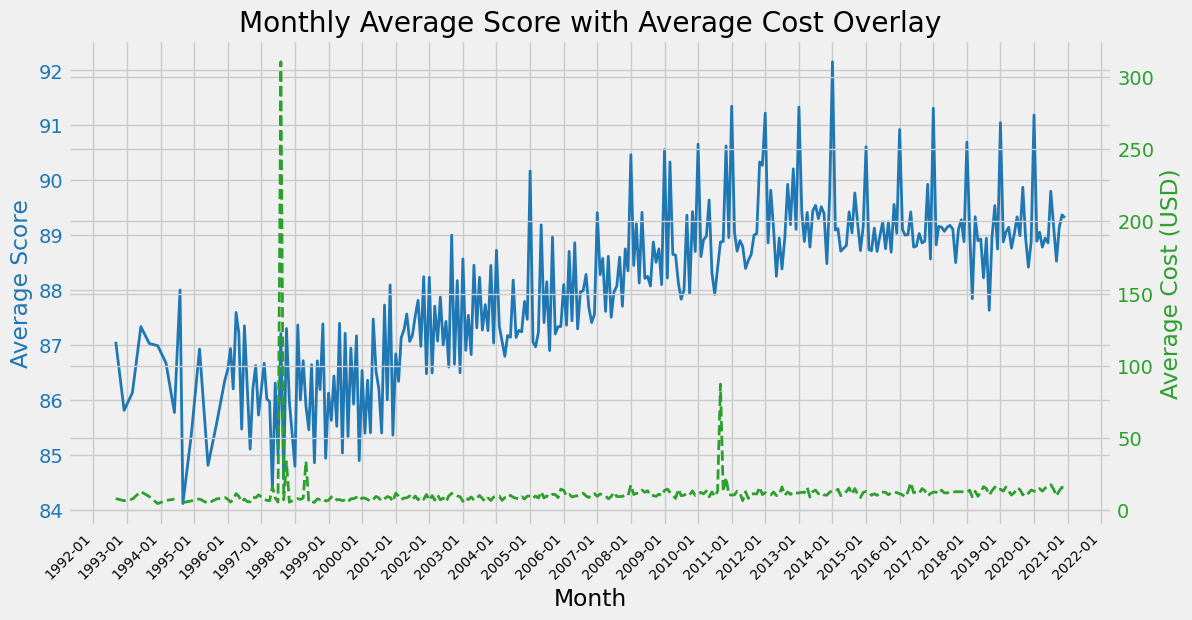

In [116]:
# Compute the monthly average score and cost
monthly_avg_score = df.groupby(df['issue_date'].dt.to_period('M'))['score'].mean()
monthly_avg_cost = df.groupby(df['issue_date'].dt.to_period('M'))['usd_value'].mean()

# Plotting the Monthly Average Score with Average Cost Overlay
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_title('Monthly Average Score with Average Cost Overlay')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Score', color='tab:blue')
ax1.plot(monthly_avg_score.index.to_timestamp(), monthly_avg_score, color='tab:blue', label='Average Score', linewidth=2)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary y-axis for monthly average cost
ax2 = ax1.twinx()
ax2.set_ylabel('Average Cost (USD)', color='tab:green')
ax2.plot(monthly_avg_cost.index.to_timestamp(), monthly_avg_cost, color='tab:green', linestyle='--', label='Average Cost', linewidth=2)
ax2.tick_params(axis='y', labelcolor='tab:green')

# Set x-axis locator and formatter for better month display
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Adjust x-axis font size and rotation for date labels
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)

plt.show()


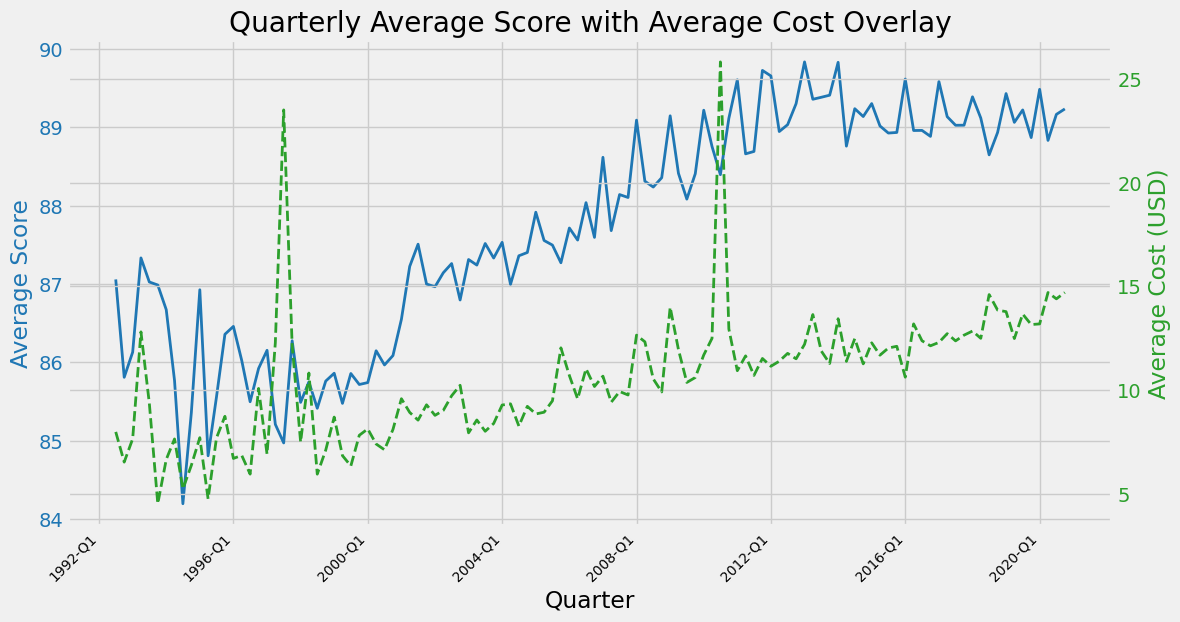

In [117]:
# Compute the quarterly average score and cost
quarterly_avg_score = df.groupby(df['issue_date'].dt.to_period('Q'))['score'].mean()
quarterly_avg_cost = df.groupby(df['issue_date'].dt.to_period('Q'))['usd_value'].mean()

# Plotting the Quarterly Average Score with Average Cost Overlay
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_title('Quarterly Average Score with Average Cost Overlay')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Average Score', color='tab:blue')
ax1.plot(quarterly_avg_score.index.to_timestamp(), quarterly_avg_score, color='tab:blue', label='Average Score', linewidth=2)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary y-axis for quarterly average cost
ax2 = ax1.twinx()
ax2.set_ylabel('Average Cost (USD)', color='tab:green')
ax2.plot(quarterly_avg_cost.index.to_timestamp(), quarterly_avg_cost, color='tab:green', linestyle='--', label='Average Cost', linewidth=2)
ax2.tick_params(axis='y', labelcolor='tab:green')

# Custom formatting for quarter display on x-axis
def format_quarter(x, pos):
    date = mdates.num2date(x)
    quarter = (date.month - 1) // 3 + 1
    return f"{date.year}-Q{quarter}"

ax1.xaxis.set_major_formatter(plt.FuncFormatter(format_quarter))
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)

plt.show()

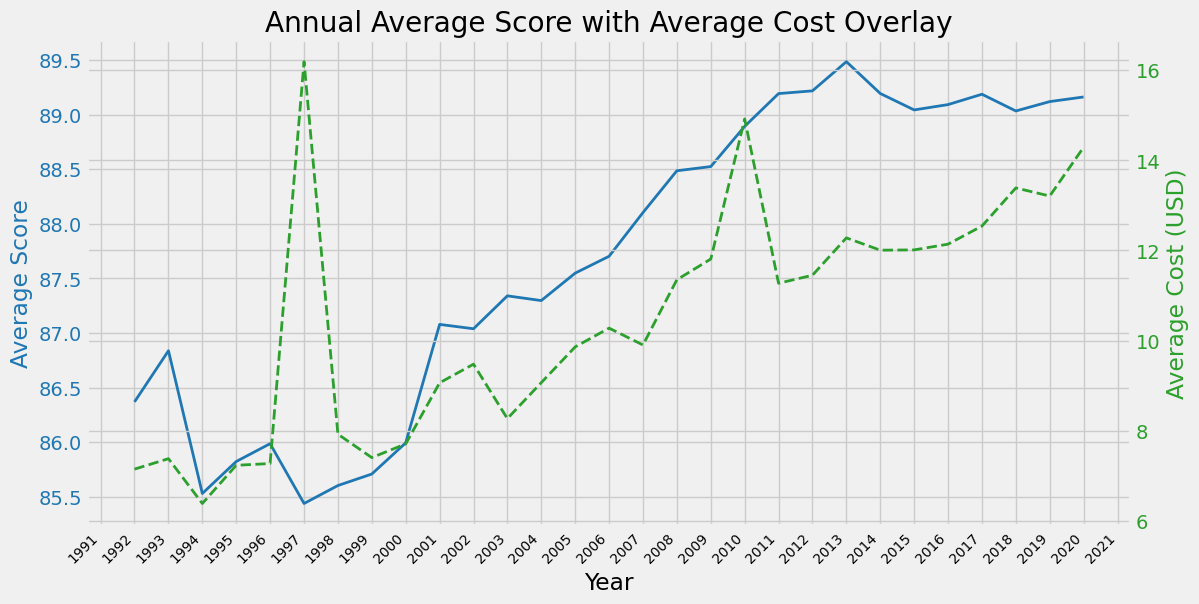

In [118]:
# Compute the annual average score and cost
annual_avg_score = df.groupby(df['issue_date'].dt.to_period('Y'))['score'].mean()
annual_avg_cost = df.groupby(df['issue_date'].dt.to_period('Y'))['usd_value'].mean()

# Plotting the Annual Average Score with Average Cost Overlay
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_title('Annual Average Score with Average Cost Overlay')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Score', color='tab:blue')

# Plot annual average score
ax1.plot(annual_avg_score.index.to_timestamp(), annual_avg_score, color='tab:blue', label='Average Score', linewidth=2)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary y-axis for annual average cost
ax2 = ax1.twinx()
ax2.set_ylabel('Average Cost (USD)', color='tab:green')
ax2.plot(annual_avg_cost.index.to_timestamp(), annual_avg_cost, color='tab:green', linestyle='--', label='Average Cost', linewidth=2)
ax2.tick_params(axis='y', labelcolor='tab:green')

# Set x-axis locator and formatter for better year display
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Adjust x-axis font size and rotation for date labels
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)

plt.show()


# price by country

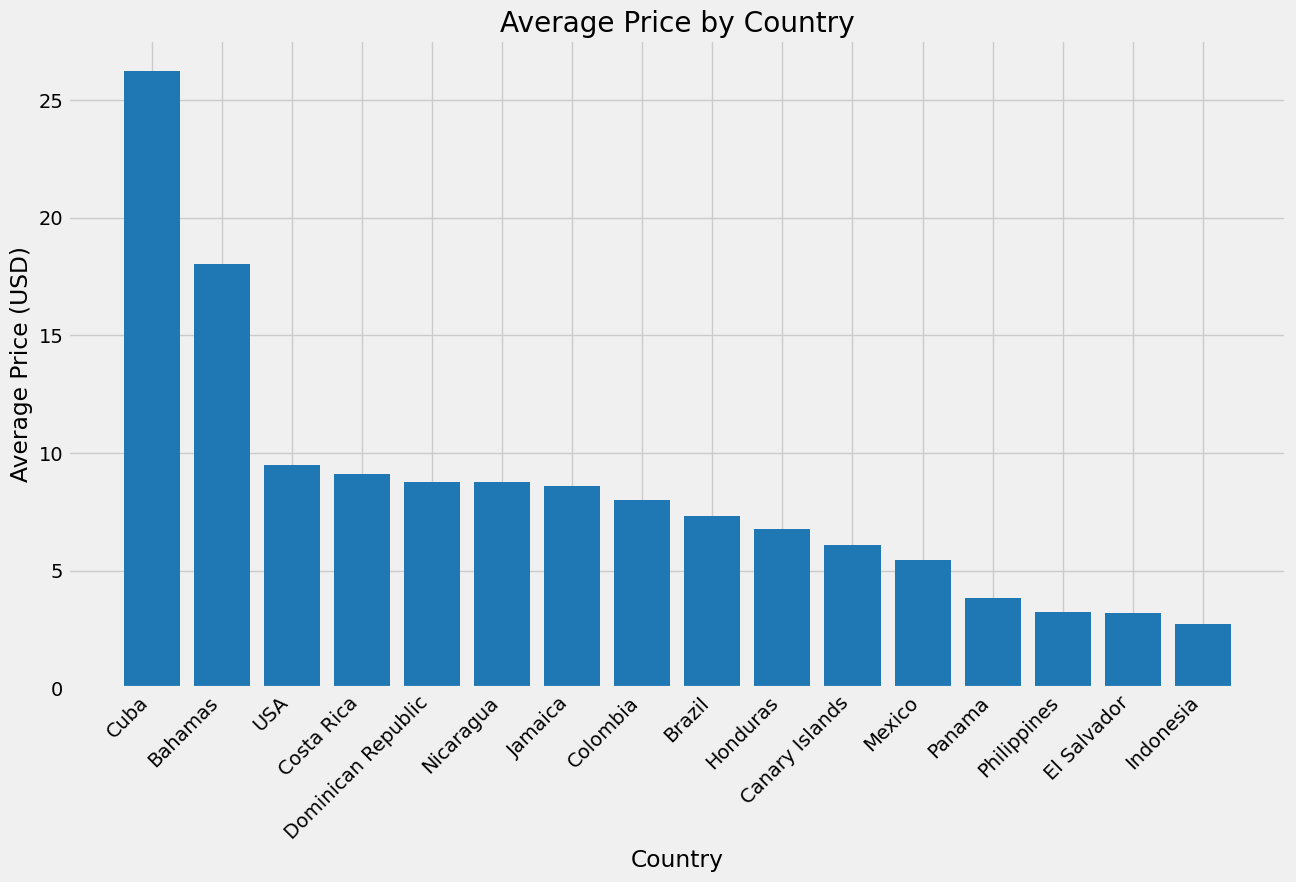

In [119]:
# Calculate the average price by country
avg_price_by_country = df.groupby('country')['usd_value'].mean().sort_values(ascending=False)

# Plot the average price by country
plt.figure(figsize=(14, 8))
plt.bar(avg_price_by_country.index, avg_price_by_country, color='tab:blue')
plt.title('Average Price by Country')
plt.xlabel('Country')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

# PRICE
## binder, filler, wrapper
### needs work

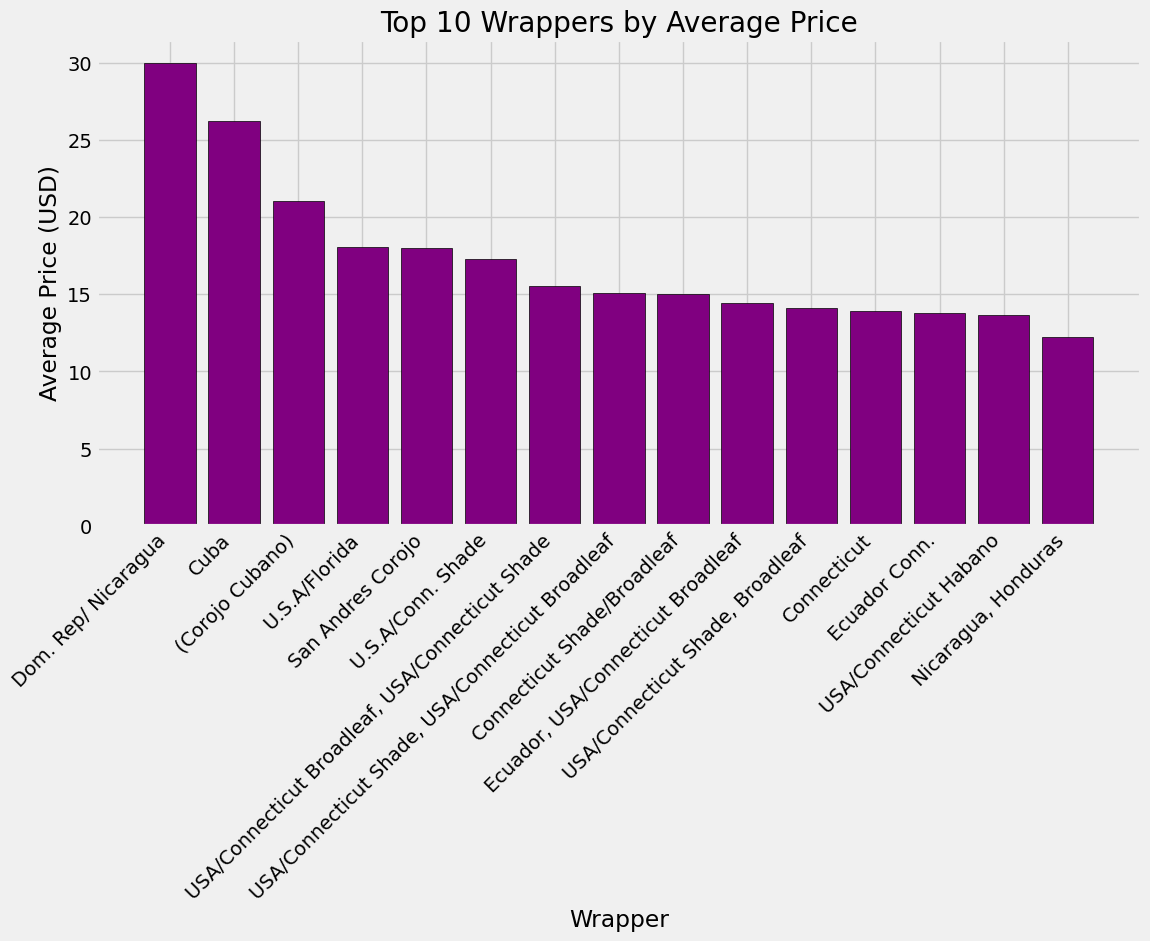

In [120]:
# Top 10 Wrappers by Average Price
top_wrappers = df.groupby('wrapper')['usd_value'].mean().nlargest(15)
plt.figure(figsize=(12, 6))
plt.bar(top_wrappers.index, top_wrappers, color='purple', edgecolor='black')
plt.title('Top 10 Wrappers by Average Price')
plt.xlabel('Wrapper')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

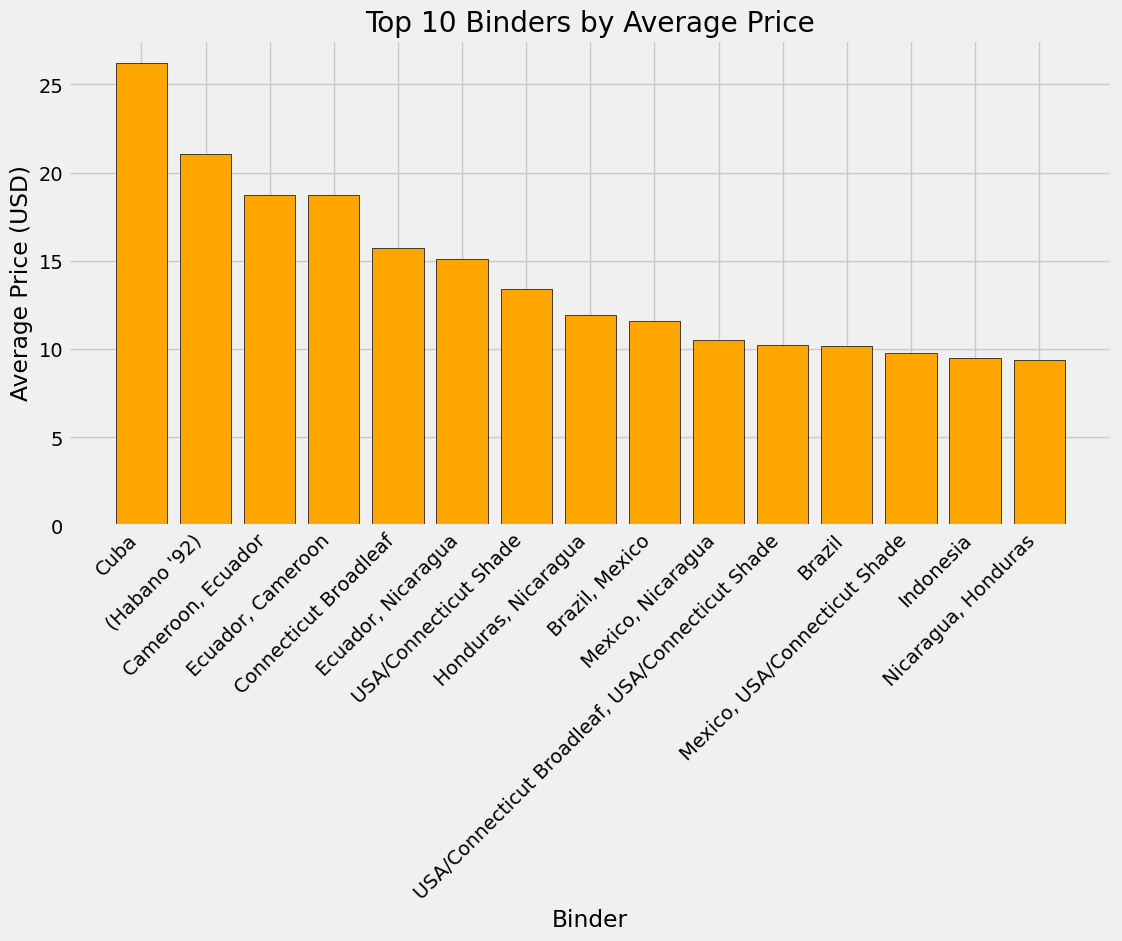

In [121]:
# Top 10 Binders by Average Price
top_binders = df.groupby('binder')['usd_value'].mean().nlargest(15)
plt.figure(figsize=(12, 6))
plt.bar(top_binders.index, top_binders, color='orange', edgecolor='black')
plt.title('Top 10 Binders by Average Price')
plt.xlabel('Binder')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

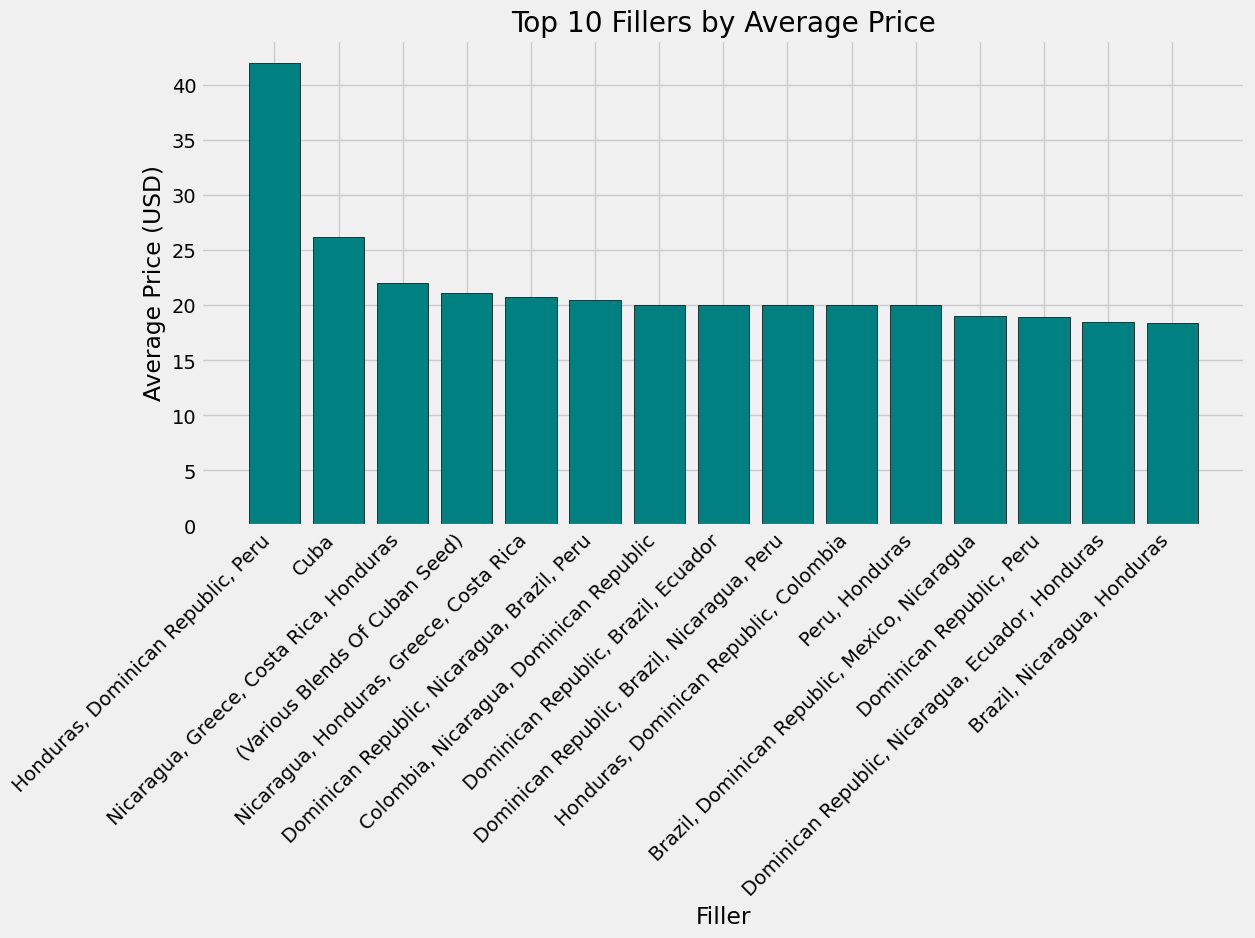

In [122]:
# Top 10 Fillers by Average Price
top_fillers = df.groupby('filler')['usd_value'].mean().nlargest(15)
plt.figure(figsize=(12, 6))
plt.bar(top_fillers.index, top_fillers, color='teal', edgecolor='black')
plt.title('Top 10 Fillers by Average Price')
plt.xlabel('Filler')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

# SCORE

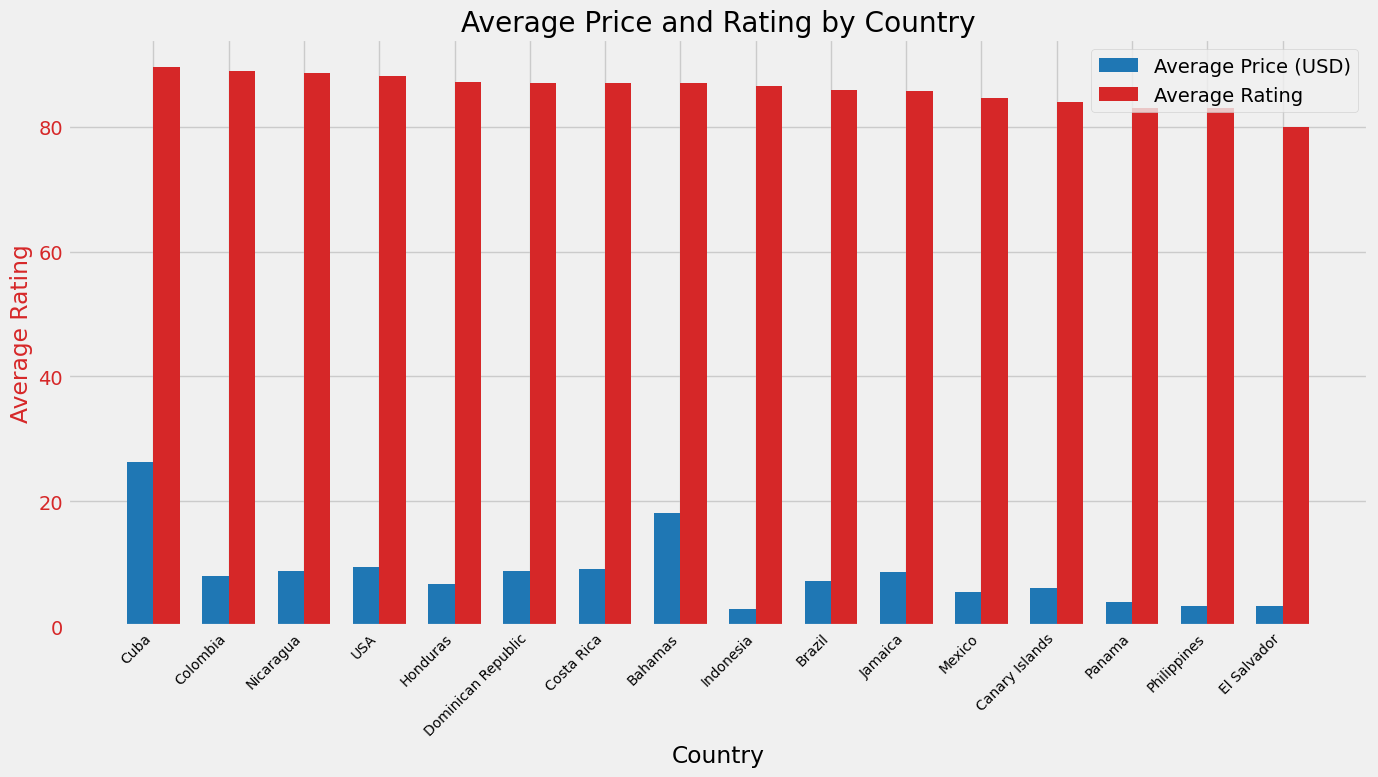

In [123]:
# Calculate the average price and score by country
avg_score_by_country = df.groupby('country')['score'].mean().sort_values(ascending=False)  # Sort by rating
avg_price_by_country = df.groupby('country')['usd_value'].mean().reindex(avg_score_by_country.index)  # Match the new order


# Setting positions for the bars
x = np.arange(len(avg_price_by_country))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plotting the average price
price_bars = ax.bar(x - width/2, avg_price_by_country, width, label='Average Price (USD)', color='tab:blue')
ax.set_xlabel('Country')
ax.set_ylabel('Average Price (USD)', color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')

# Plotting the average rating
score_bars = ax.bar(x + width/2, avg_score_by_country, width, label='Average Rating', color='tab:red')
ax.set_ylabel('Average Rating', color='tab:red')
ax.tick_params(axis='y', labelcolor='tab:red')

# Set x-axis labels and ticks
ax.set_xticks(x)
ax.set_xticklabels(avg_price_by_country.index, rotation=45, ha='right', fontsize=10)

# Adding the title and legend
ax.set_title('Average Price and Rating by Country')
ax.legend()

# Adjust layout to fit everything nicely
fig.tight_layout()
plt.show()

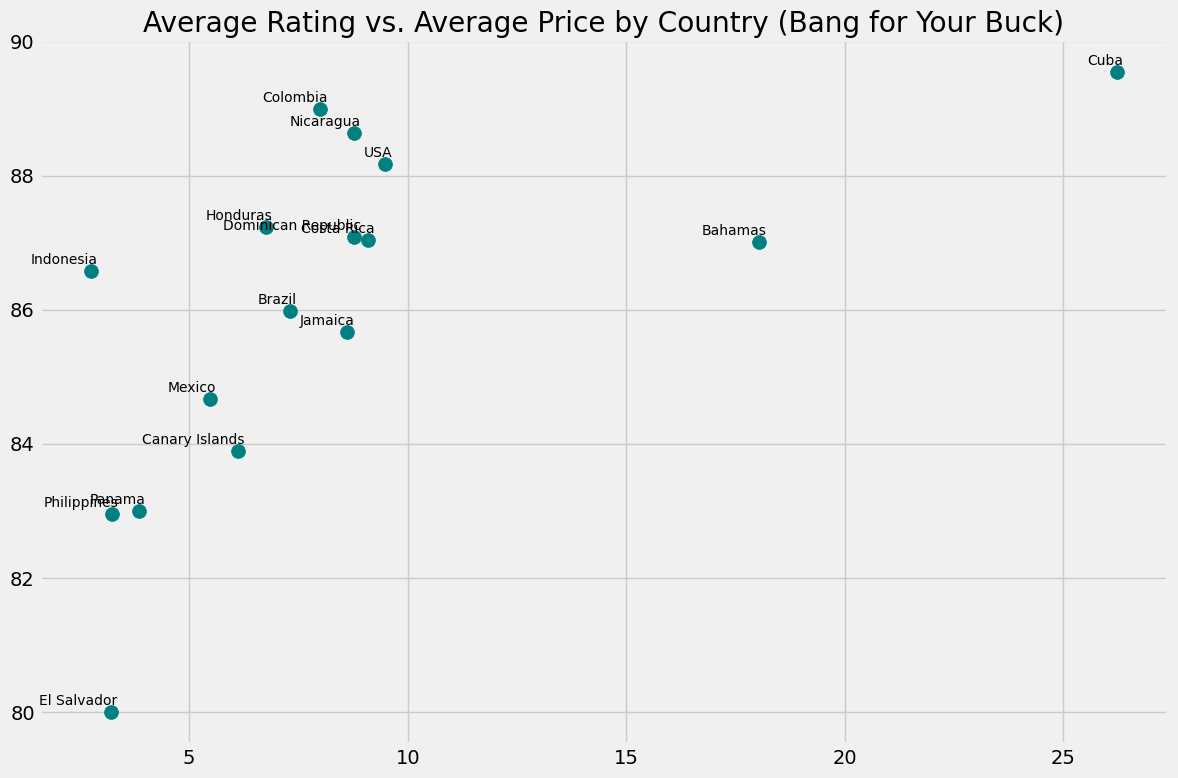

In [124]:
# Calculate the average price and average rating by country
avg_price_by_country = df.groupby('country')['usd_value'].mean()
avg_score_by_country = df.groupby('country')['score'].mean()

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(avg_price_by_country, avg_score_by_country, color='teal', s=100)

# Adding annotations to points with larger font size
for country in avg_price_by_country.index:
    plt.annotate(country, (avg_price_by_country[country], avg_score_by_country[country]), 
                 textcoords="offset points", xytext=(5, 5), ha='right', fontsize=10)  # Increased font size to 10

# Labels and title
plt.title('Average Rating vs. Average Price by Country (Bang for Your Buck)')
plt.xlabel
plt.tight_layout()


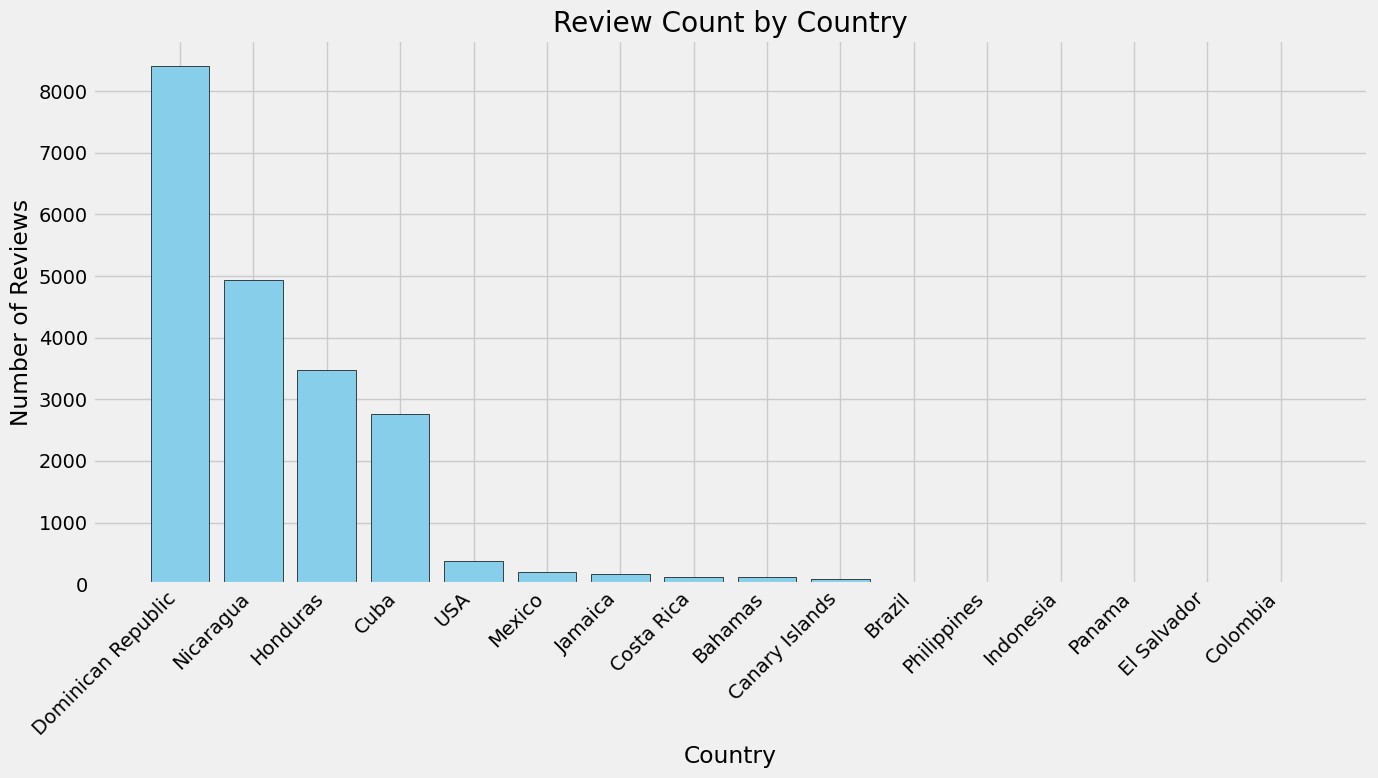

<Figure size 640x480 with 0 Axes>

In [125]:
# Calculate the review count by country
review_count_by_country = df['country'].value_counts()

# Plotting the review count by country
plt.figure(figsize=(14, 8))
plt.bar(review_count_by_country.index, review_count_by_country.values, color='skyblue', edgecolor='black')
plt.title('Review Count by Country')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()
plt.tight_layout()